In [64]:
## 数据操作
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

## 可视化
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size'] = 18
# plt.rcParams['patch.edgecolor'] = 'k'
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 组件
import gc
import os
from tqdm import tqdm

# 函数集合

In [30]:
## 字段，nunique等基本信息
def get_info(df, head=10):
  print(df.shape)
  print('\n', '----------------各列特征信息如下------------------')
  stats = []
  for col in df.columns:
    stats.append(
      (col, df[col].nunique(),
       round(df[col].isnull().sum()*100 / df.shape[0], 3),
       round(df[col].value_counts(normalize=True, dropna=False).values[0]*100, 3),
       df[col].dtype
      )
    )
  stats_df = pd.DataFrame(stats, columns=['特征', '属性个性', '缺失值占比', '最大属性占比', '特征类型'])

  print(stats_df.sort_values('缺失值占比', ascending=False).head(head))

def visualize_col(x, df):
    print(f'{x}\n{"-"*30}')

    print(f'Mean: {df[x].mean():.3f} - Median: {df[x].median():.3f} - Std: {df[x].std():.3f}')
    print(f'Min: {df[x].min():.3f} - 25%: {df[x].quantile(0.25):.3f} - 50%: {df[x].quantile(0.5):.3f}')
    print(f'75%: {df[x].quantile(0.75):.3f} - Max: {df[x].max():.3f} - Skew: {df[x].skew():.3f}')
    missing_count = df[df[x].isnull()].shape[0]
    total_count = df.shape[0]
    print(f'Missing Values: {missing_count}/{total_count} ({missing_count * 100 / total_count:.3f}%)')

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=(24, 6))
    sns.kdeplot(x=x, data=df, ax=axes[0])
    axes[0].axvline(df[x].mean(), label='Mean', color='r', linewidth=2, linestyle='--')
    axes[0].axvline(df[x].median(), label='Median', color='b', linewidth=2, linestyle='--')
    axes[0].set_title(f'{x} Distribution')
    axes[0].legend()

    sns.boxplot(x=x, data=df, ax=axes[1])
    axes[1].set_title(f'{x} Boxplot')

# 读取数据

In [4]:
data = pd.read_csv('E:\爬虫\jjwx\无差别爬取数据\无差别爬取.csv')
data.head()

,a_作品字数,a_作品状态,a_作者,a_作者所发送红包数,a_小说完本数,a_小说暂停数,a_小说连载数,a_最后更新时间,a_最近更新作品,a_被收藏数,...,b_总点击量,b_文章名称,b_文章当前被收藏数,b_文章积分,b_文章类型,b_文章进度,b_签约状态,b_营养液数,b_霸王票全站排行,piece_url
0,157033,连载,挖坑不填,40,121,25,173,2022-02-20 22:07:26,《[主名柯]关于我有三话存稿但还是被催稿是不是哪里搞错了》...,25490,...,39657,[综]尤莉卡的秘密恋爱关系,865,98595808,衍生-言情-架空历史-东方衍生,连载,已签约,63,231776.0,https://www.jjwxc.net/onebook.php?novelid=3350289
1,60744,连载,一宫兴子,20,18,0,25,2020-12-13 15:34:56,《[综英美]而那个成功的反派却想要回到过去》,1530,...,22671,[综英美]而那个成功的反派却想要回到过去,591,9550995,衍生-纯爱-架空历史-西方衍生,连载,已签约,437,178142.0,https://www.jjwxc.net/onebook.php?novelid=3649925
2,60744,连载,一宫兴子,20,18,0,25,2020-12-13 15:34:56,《[综英美]而那个成功的反派却想要回到过去》,1530,...,123219,[TSN/ME]当你的脑子里多了一个人的正确解决方法,904,15546017,衍生-纯爱-近代现代-西方衍生,完结,已签约,297,112990.0,https://www.jjwxc.net/onebook.php?novelid=3594257
3,157033,连载,挖坑不填,40,121,25,173,2022-02-20 22:07:26,《[主名柯]关于我有三话存稿但还是被催稿是不是哪里搞错了》...,25490,...,10135,[猫鼠游戏]圆桌骑士和亚瑟王的圣杯,110,90343528,衍生-言情-架空历史-西方衍生,完结,已签约,10,321141.0,https://www.jjwxc.net/onebook.php?novelid=1567124
4,157033,连载,挖坑不填,40,121,25,173,2022-02-20 22:07:26,《[主名柯]关于我有三话存稿但还是被催稿是不是哪里搞错了》...,25490,...,17097,[奇幻贵公子/恶灵猎人]生当复来归,263,93998864,衍生-言情-架空历史-东方衍生,完结,已签约,41,NaN,https://www.jjwxc.net/onebook.php?novelid=1458297


# 基本信息

In [8]:
get_info(data, 10)

(318674, 27)

 ----------------各列特征信息如下------------------
                特征  属性个性  缺失值占比  最大属性占比 特征类型
25  b_霸王票全站排行    127179      47.866        47.866  float64
11        b_作品视角         6       0.291        55.443   object
12        b_作品风格         6       0.026        58.647   object
18        b_文章名称    305010       0.002         0.061   object
0         a_作品字数     35946       0.000         0.123    int64
15        b_总书评数     14251       0.000        26.855    int64
24        b_营养液数     16394       0.000        39.700    int64
23        b_签约状态         2       0.000        86.714   object
22        b_文章进度         3       0.000        49.290   object
21        b_文章类型       452       0.000        21.247   object


该数据共有 318674 条数据，作品视角有 6 种，文章名称有 305010 个，霸王票全站排行有 47.866% 的作品没有上榜

# 可视化

作品字数

a_作品字数
------------------------------
Mean: 222802.784 - Median: 156648.000 - Std: 294483.951
Min: 0.000 - 25%: 53550.000 - 50%: 156648.000
75%: 290300.000 - Max: 9363634.000 - Skew: 7.291
Missing Values: 0/318674 (0.000%)


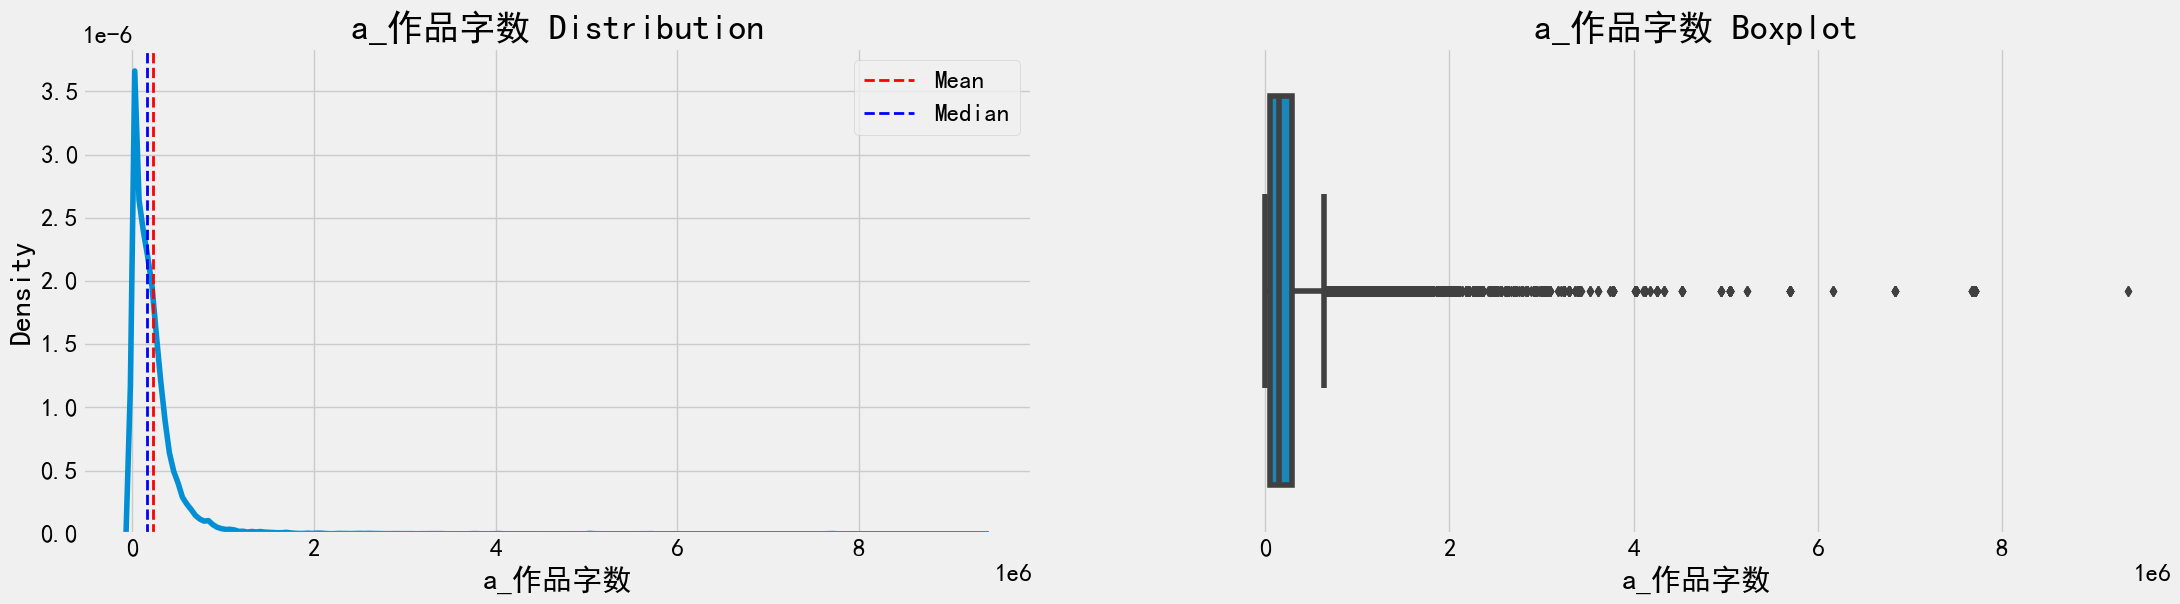

In [31]:
visualize_col('a_作品字数', data)

a_作者所发送红包数

a_作者所发送红包数
------------------------------
Mean: 1551.781 - Median: 41.000 - Std: 9422.297
Min: 0.000 - 25%: 1.000 - 50%: 41.000
75%: 307.000 - Max: 393066.000 - Skew: 15.791
Missing Values: 0/318674 (0.000%)


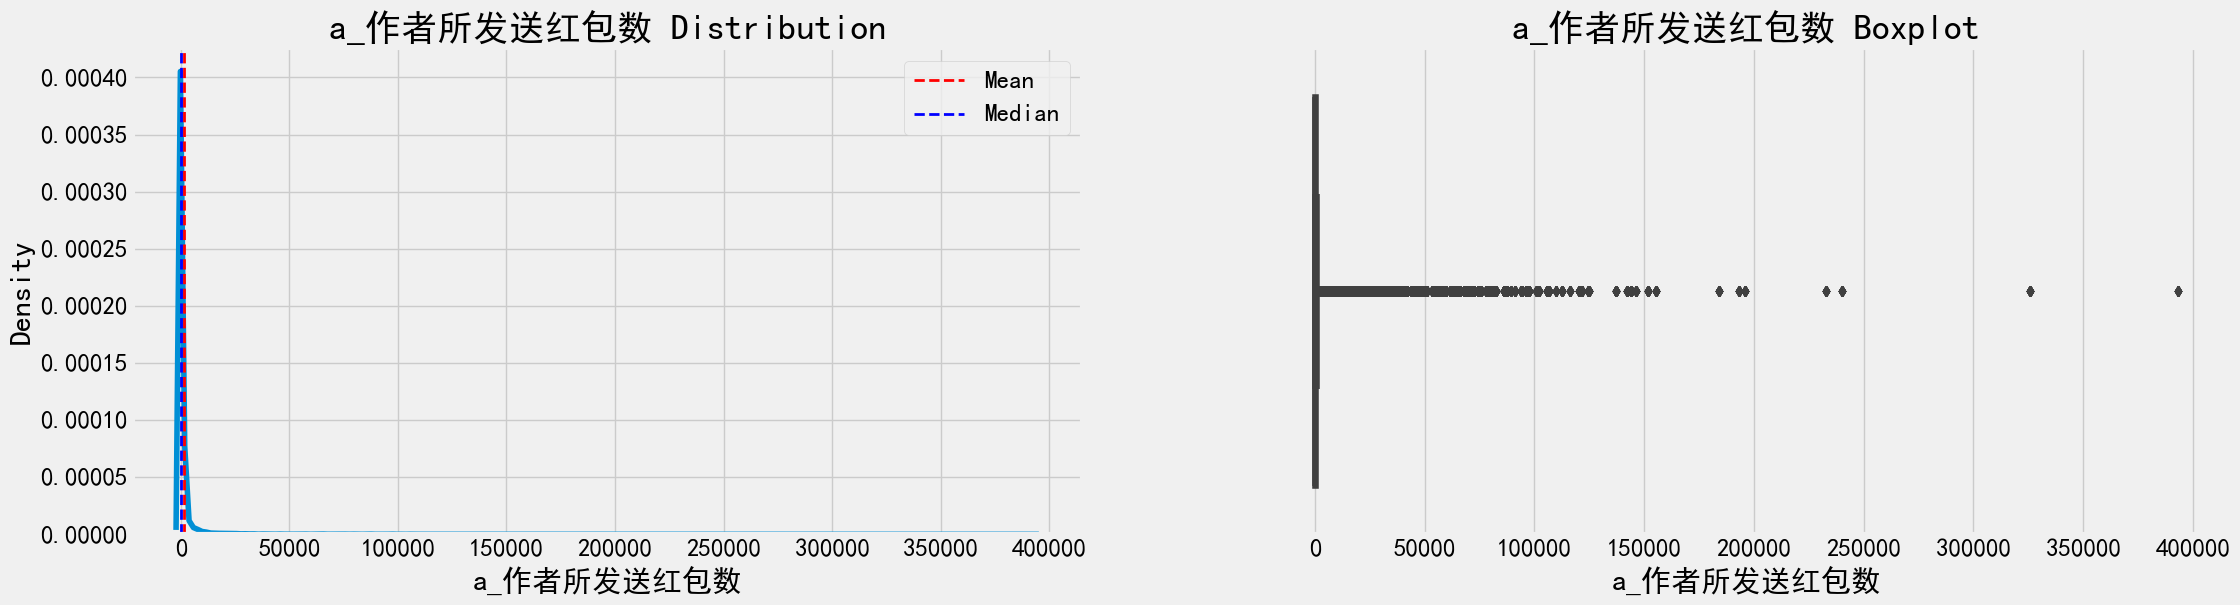

In [34]:
visualize_col('a_作者所发送红包数', data)

小说完本数

a_小说完本数
------------------------------
Mean: 11.598 - Median: 7.000 - Std: 13.563
Min: 0.000 - 25%: 3.000 - 50%: 7.000
75%: 15.000 - Max: 238.000 - Skew: 3.403
Missing Values: 0/318674 (0.000%)


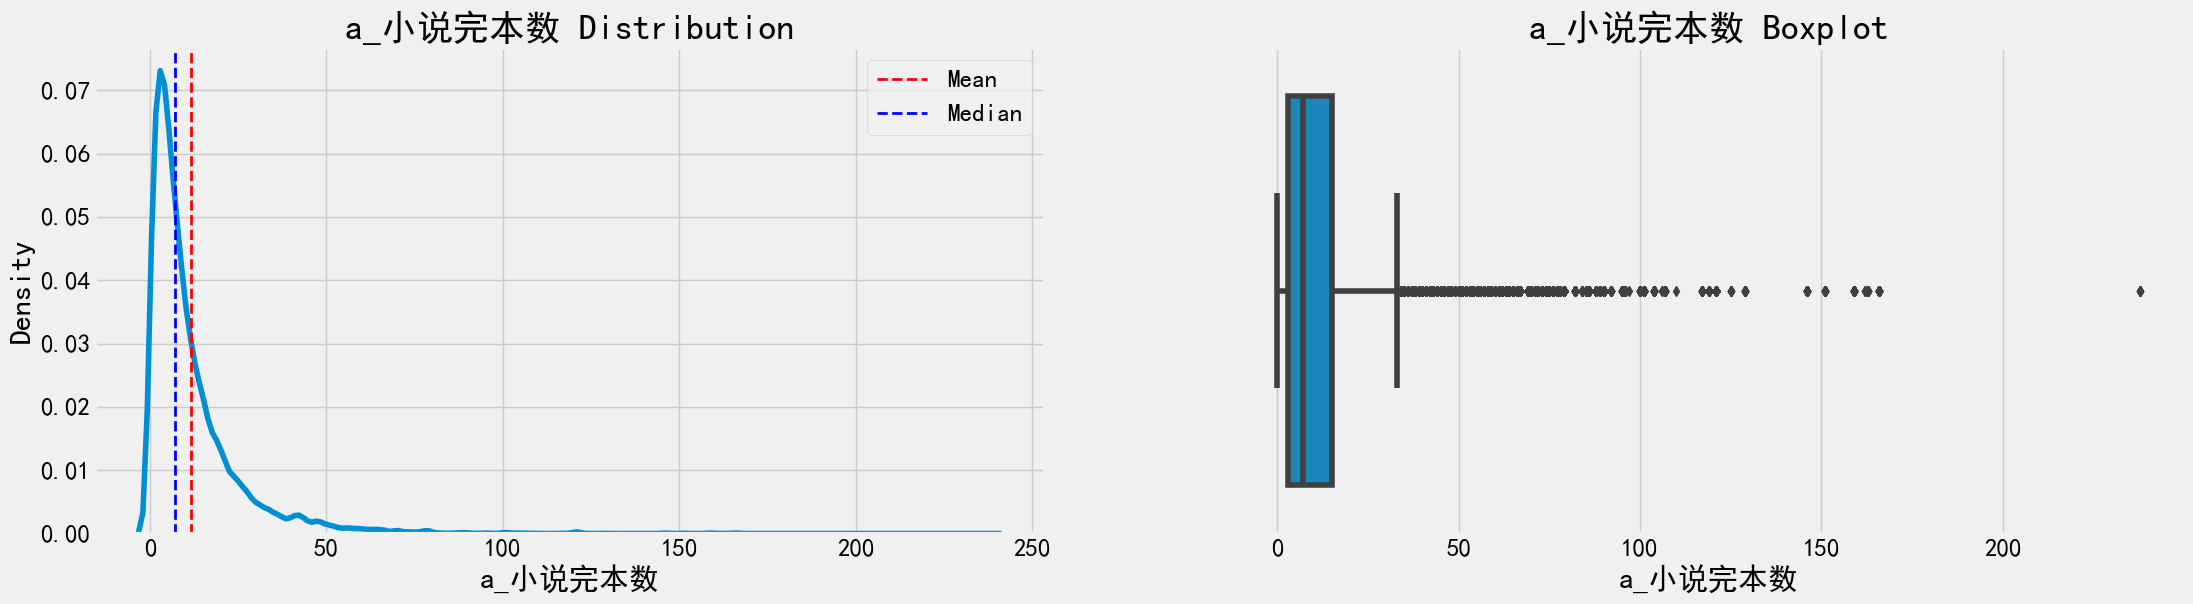

In [35]:
visualize_col('a_小说完本数', data)

小说连载数

a_小说连载数
------------------------------
Mean: 9.254 - Median: 6.000 - Std: 15.214
Min: 0.000 - 25%: 4.000 - 50%: 6.000
75%: 10.000 - Max: 333.000 - Skew: 10.845
Missing Values: 0/318674 (0.000%)


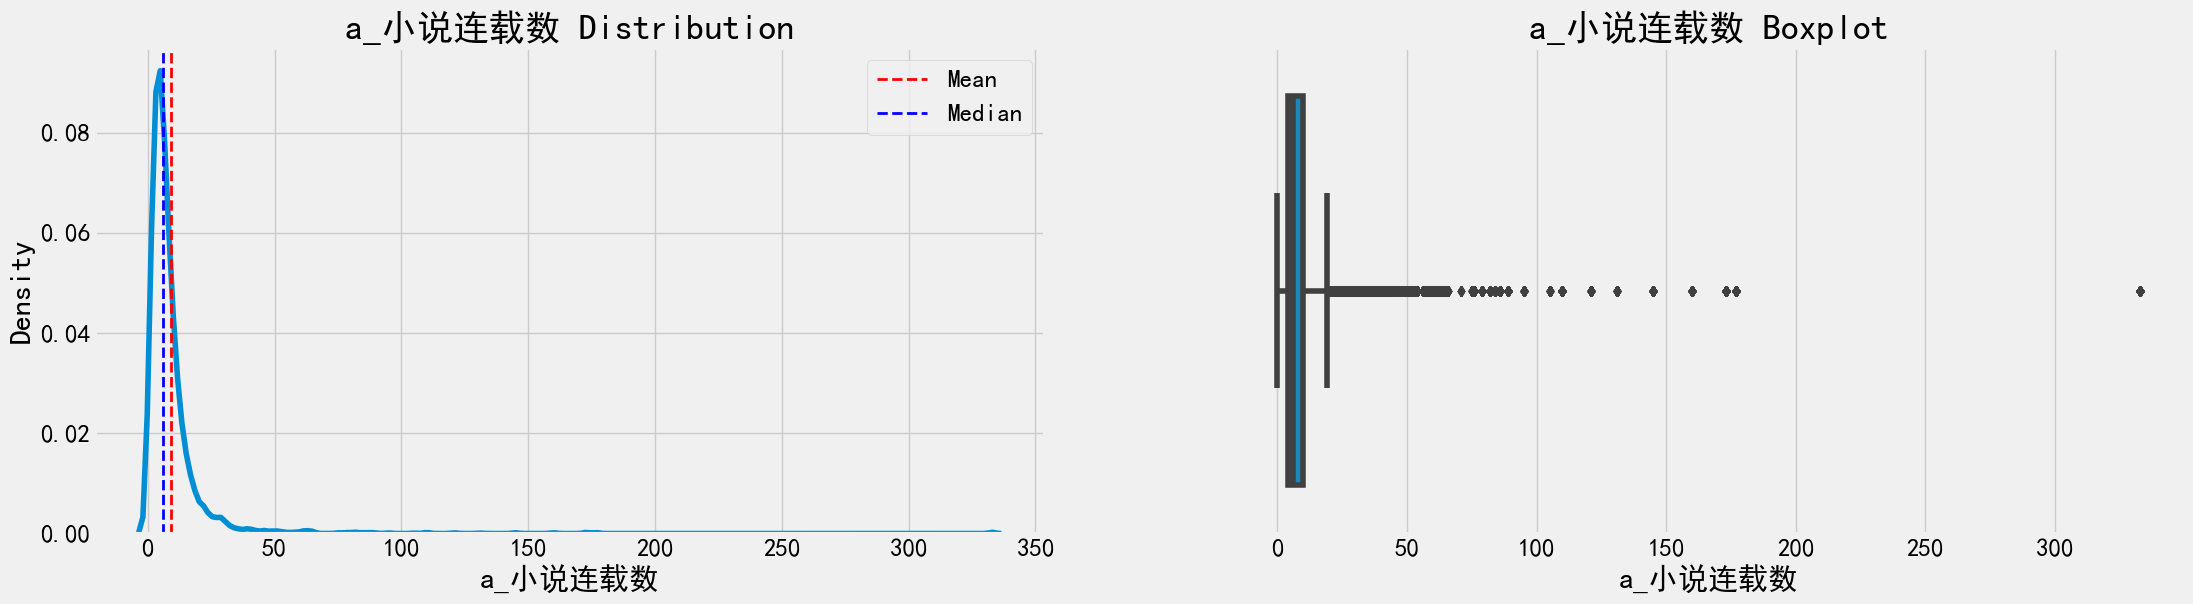

In [37]:
visualize_col('a_小说连载数', data)

小说连载数

a_小说连载数
------------------------------
Mean: 9.254 - Median: 6.000 - Std: 15.214
Min: 0.000 - 25%: 4.000 - 50%: 6.000
75%: 10.000 - Max: 333.000 - Skew: 10.845
Missing Values: 0/318674 (0.000%)


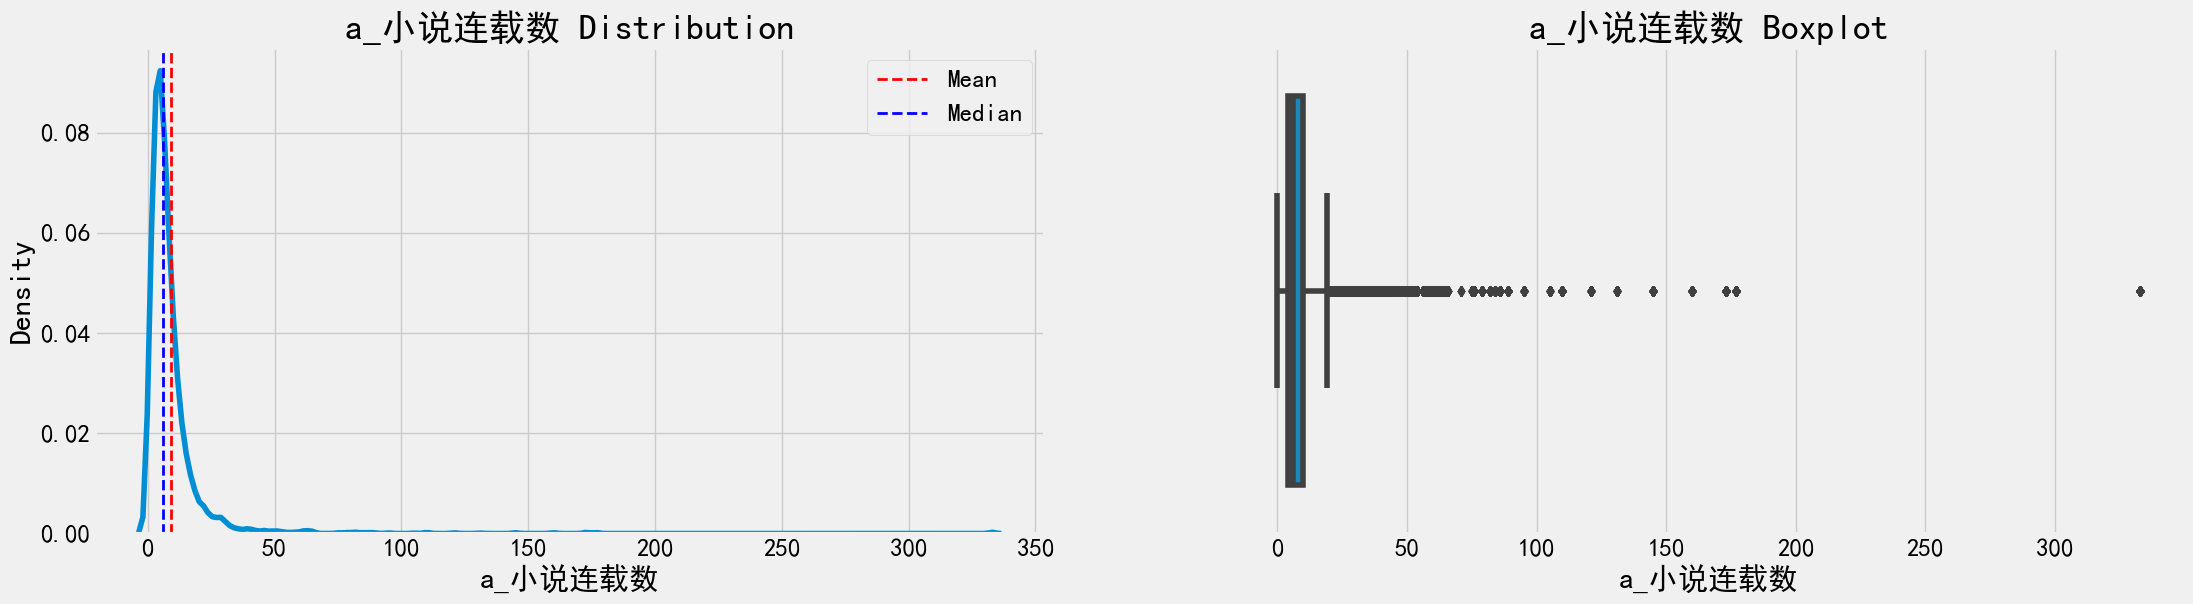

In [39]:
visualize_col('a_小说连载数', data)

被收藏数

a_被收藏数
------------------------------
Mean: 3620.157 - Median: 358.000 - Std: 21570.228
Min: 0.000 - 25%: 107.000 - 50%: 358.000
75%: 1541.000 - Max: 1152855.000 - Skew: 26.167
Missing Values: 0/318674 (0.000%)


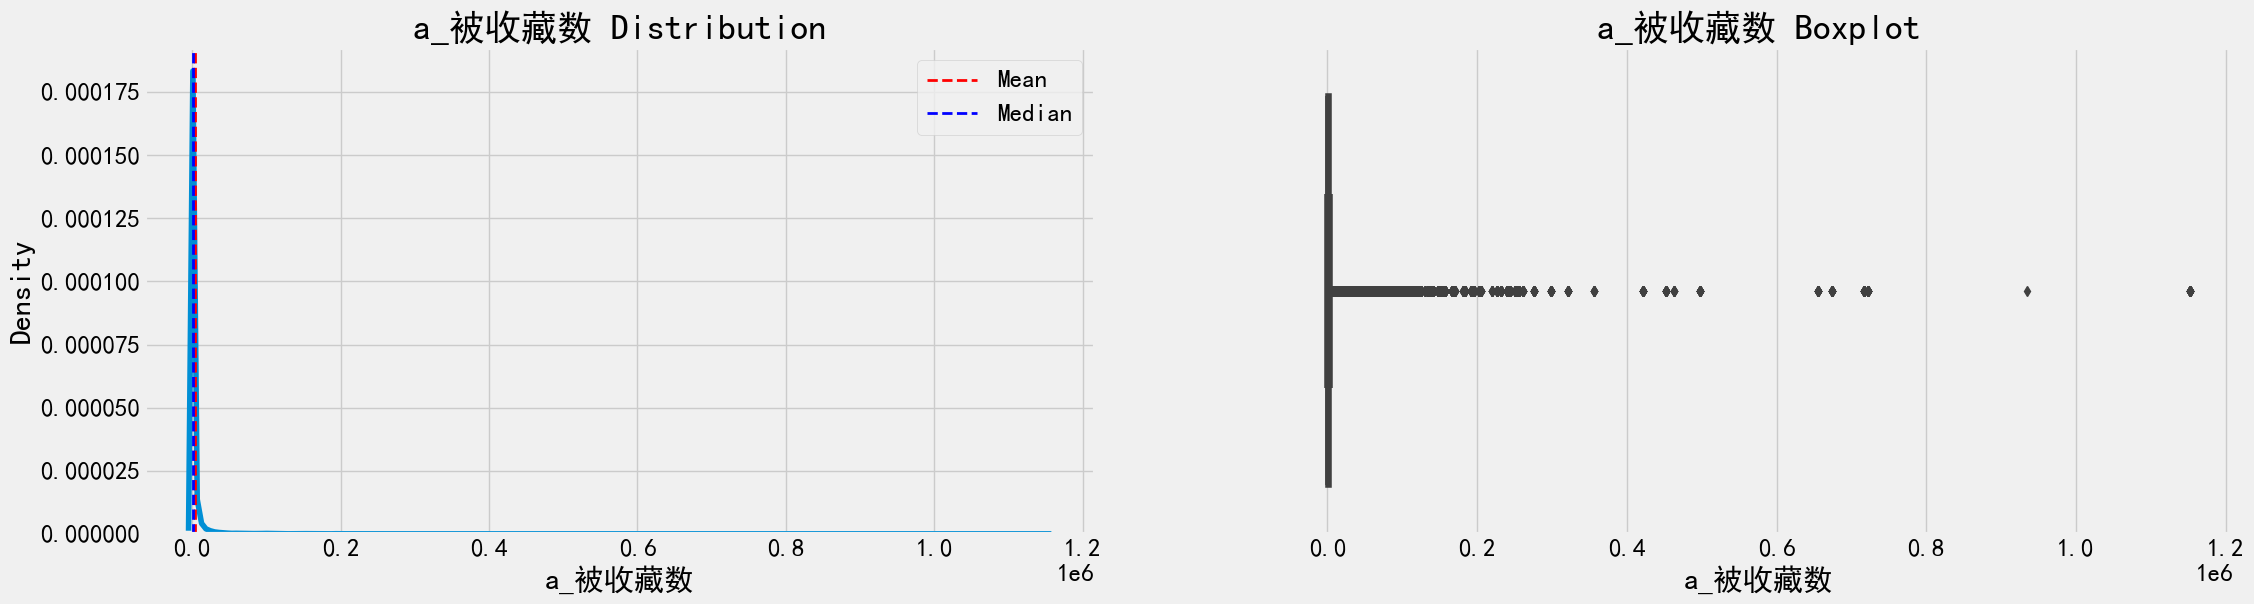

In [40]:
visualize_col('a_被收藏数', data)

全文字数

b_全文字数
------------------------------
Mean: 144871.220 - Median: 60114.500 - Std: 214647.902
Min: 0.000 - 25%: 0.000 - 50%: 60114.500
75%: 224535.750 - Max: 9363634.000 - Skew: 4.790
Missing Values: 0/318674 (0.000%)


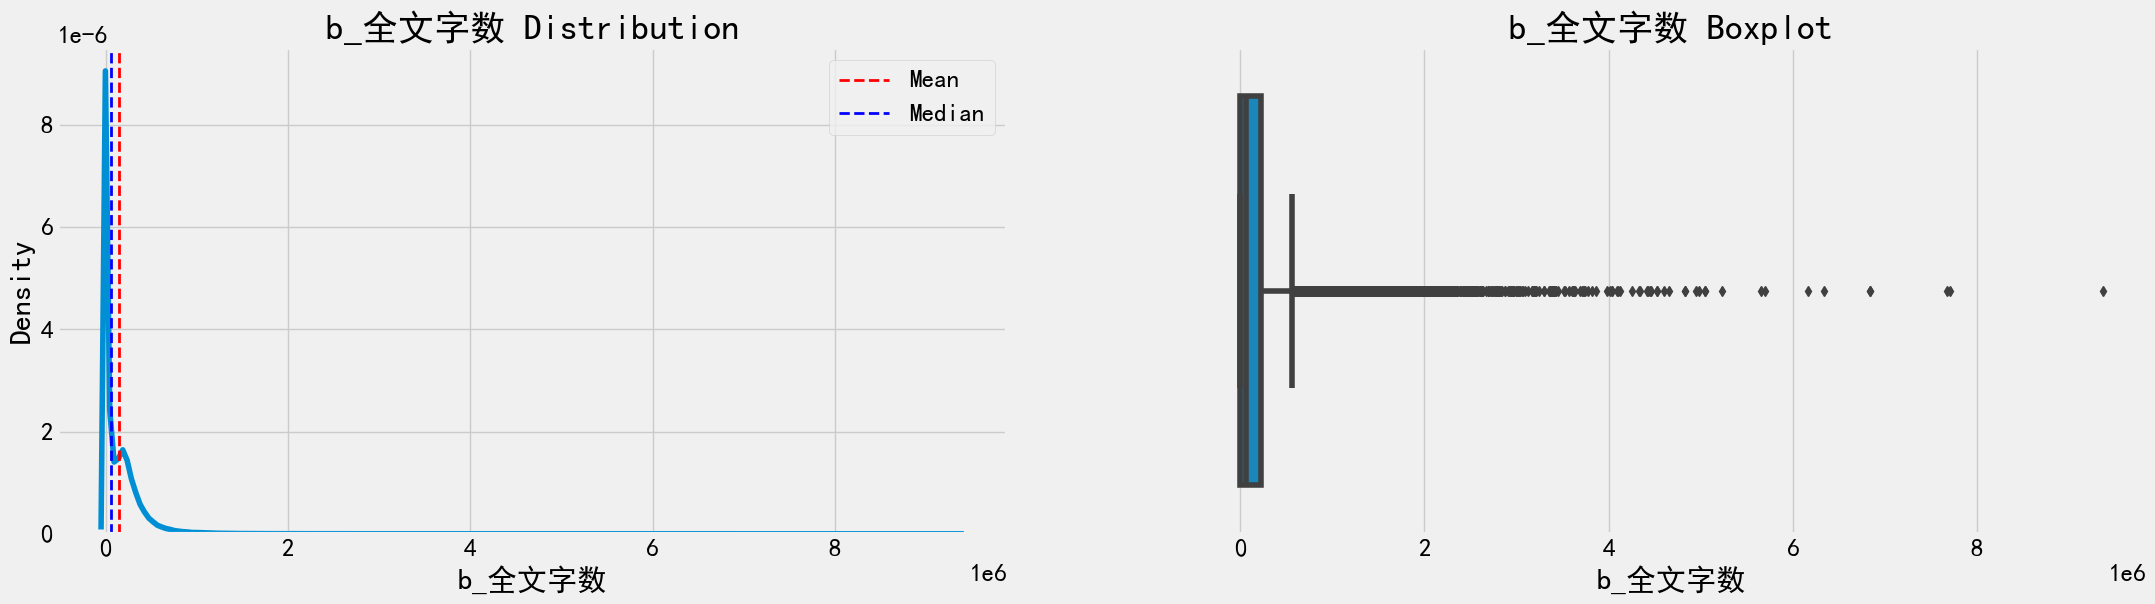

In [41]:
visualize_col('b_全文字数', data)

总书评数

b_总书评数
------------------------------
Mean: 1174.098 - Median: 40.000 - Std: 8635.526
Min: 0.000 - 25%: 0.000 - 50%: 40.000
75%: 438.000 - Max: 915341.000 - Skew: 39.509
Missing Values: 0/318674 (0.000%)


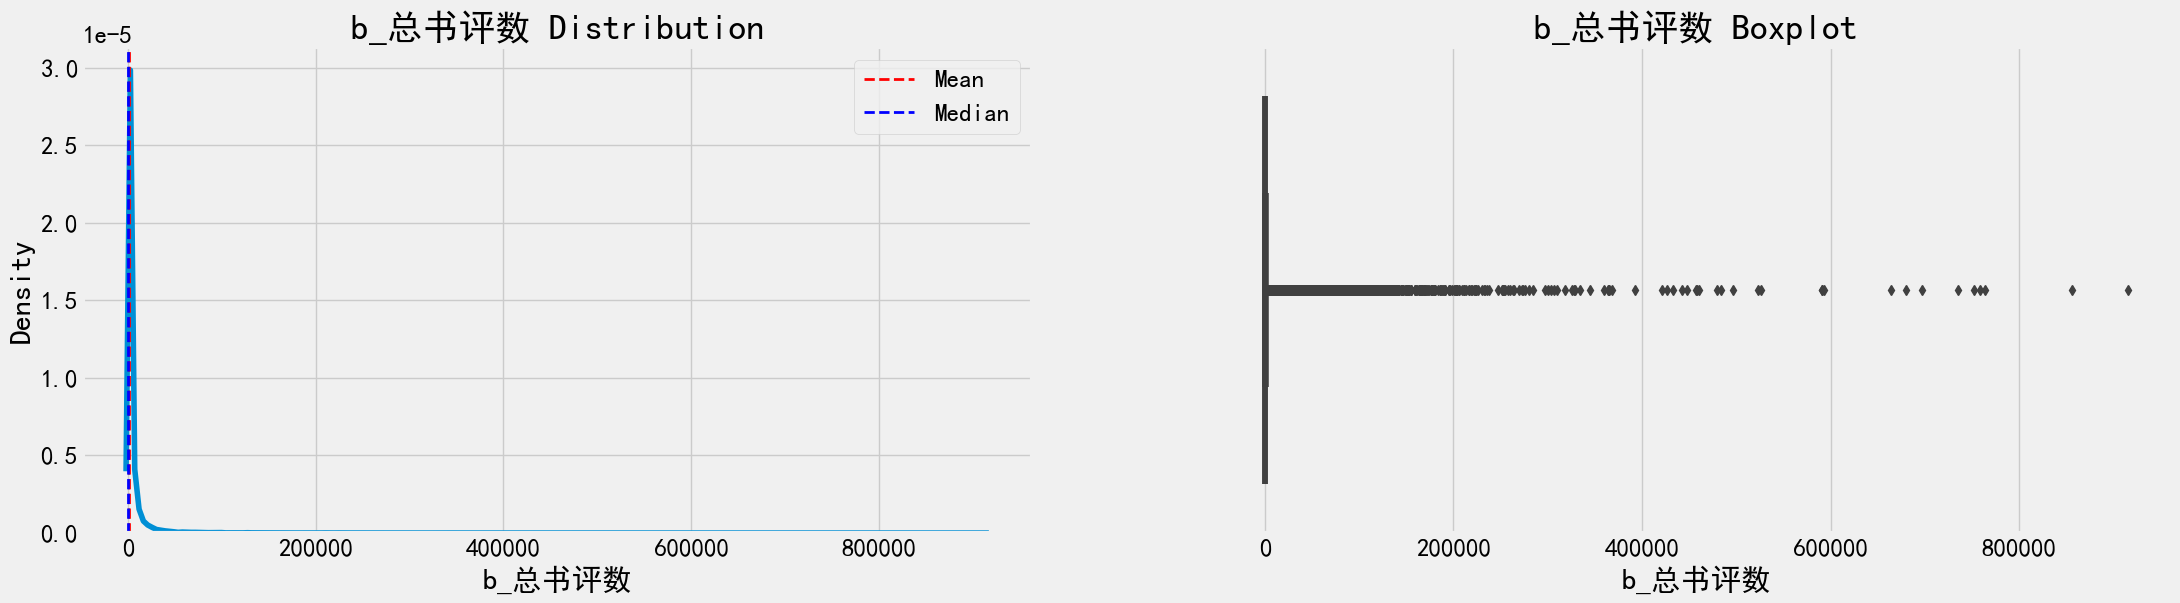

In [42]:
visualize_col('b_总书评数', data)

总点击量

b_总点击量
------------------------------
Mean: 275219.646 - Median: 19377.000 - Std: 1260700.998
Min: 0.000 - 25%: 0.000 - 50%: 19377.000
75%: 203105.250 - Max: 360628245.000 - Skew: 105.472
Missing Values: 0/318674 (0.000%)


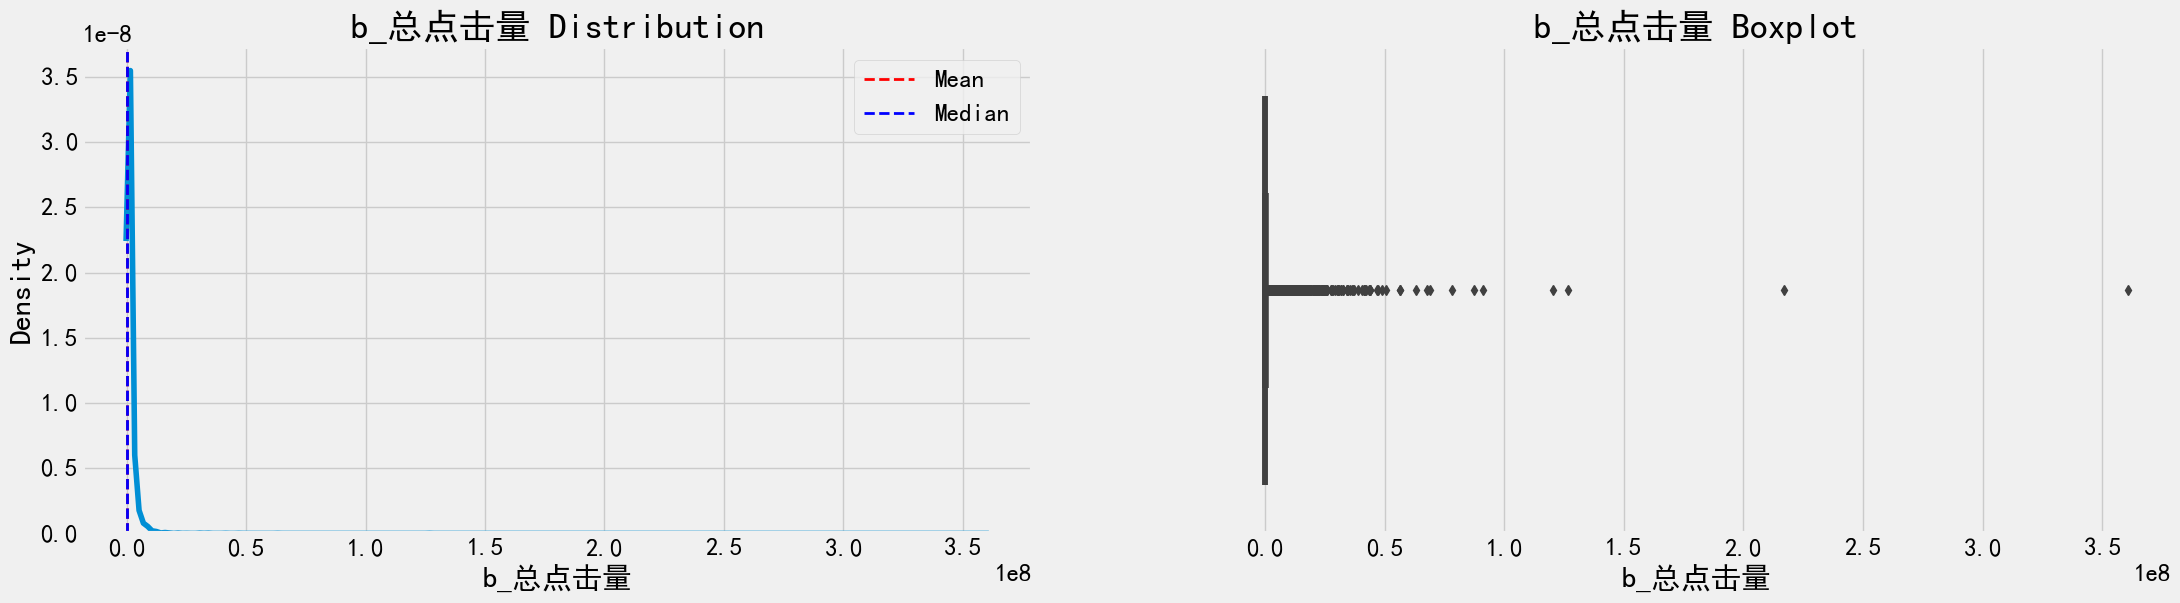

In [43]:
visualize_col('b_总点击量', data)

文章当前被收藏数

b_文章当前被收藏数
------------------------------
Mean: 3001.902 - Median: 243.000 - Std: 15480.892
Min: 0.000 - 25%: 29.000 - 50%: 243.000
75%: 1693.000 - Max: 1443357.000 - Skew: 29.507
Missing Values: 0/318674 (0.000%)


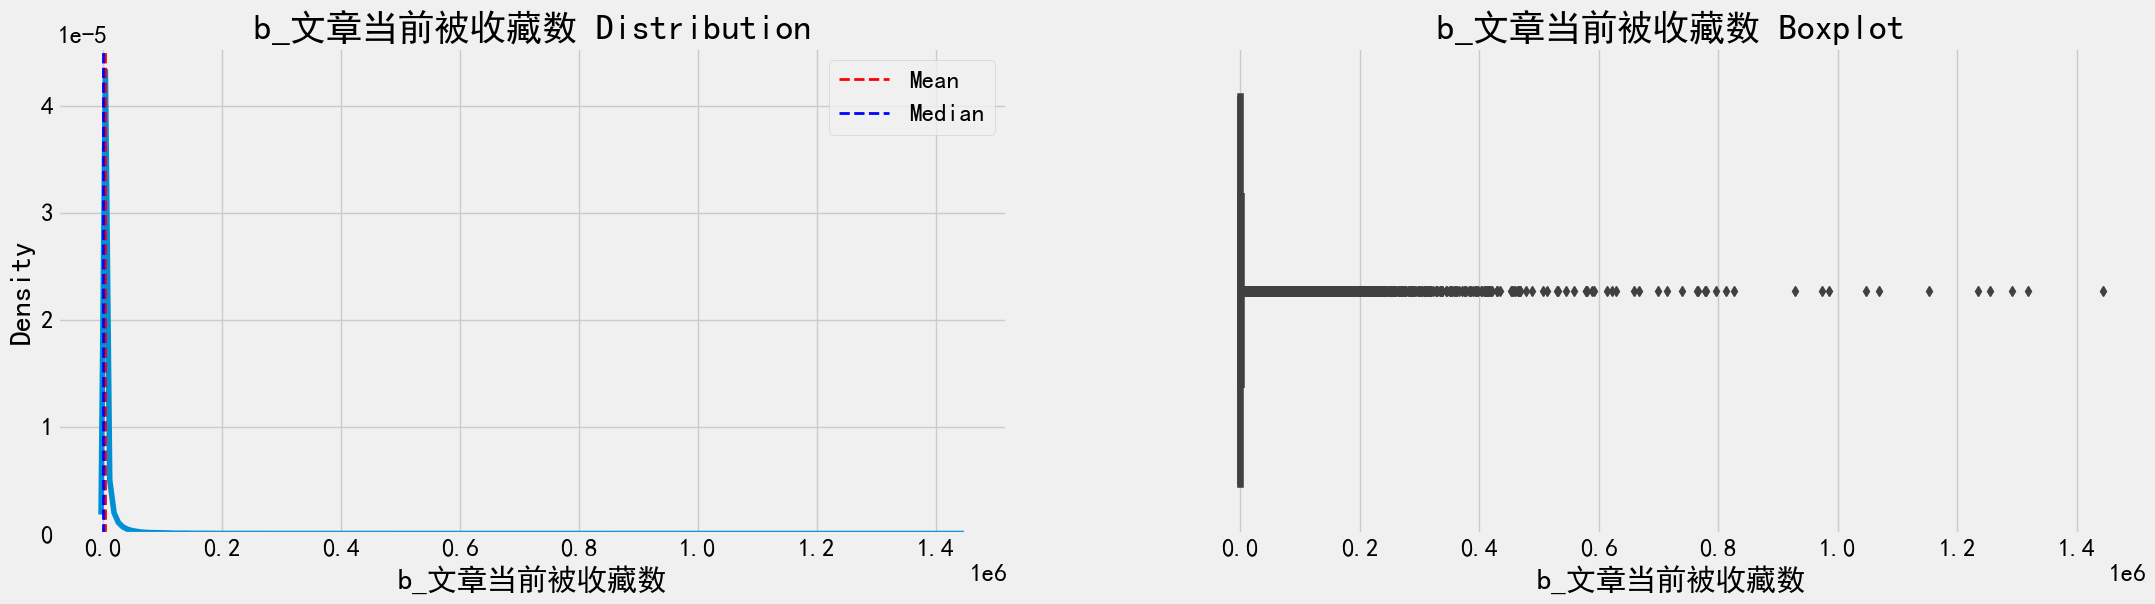

In [44]:
visualize_col('b_文章当前被收藏数', data)

文章积分

b_文章积分
------------------------------
Mean: 54827521.316 - Median: 5867113.000 - Std: 330882130.842
Min: 0.000 - 25%: 866790.250 - 50%: 5867113.000
75%: 27279014.000 - Max: 32379904000.000 - Skew: 33.613
Missing Values: 0/318674 (0.000%)


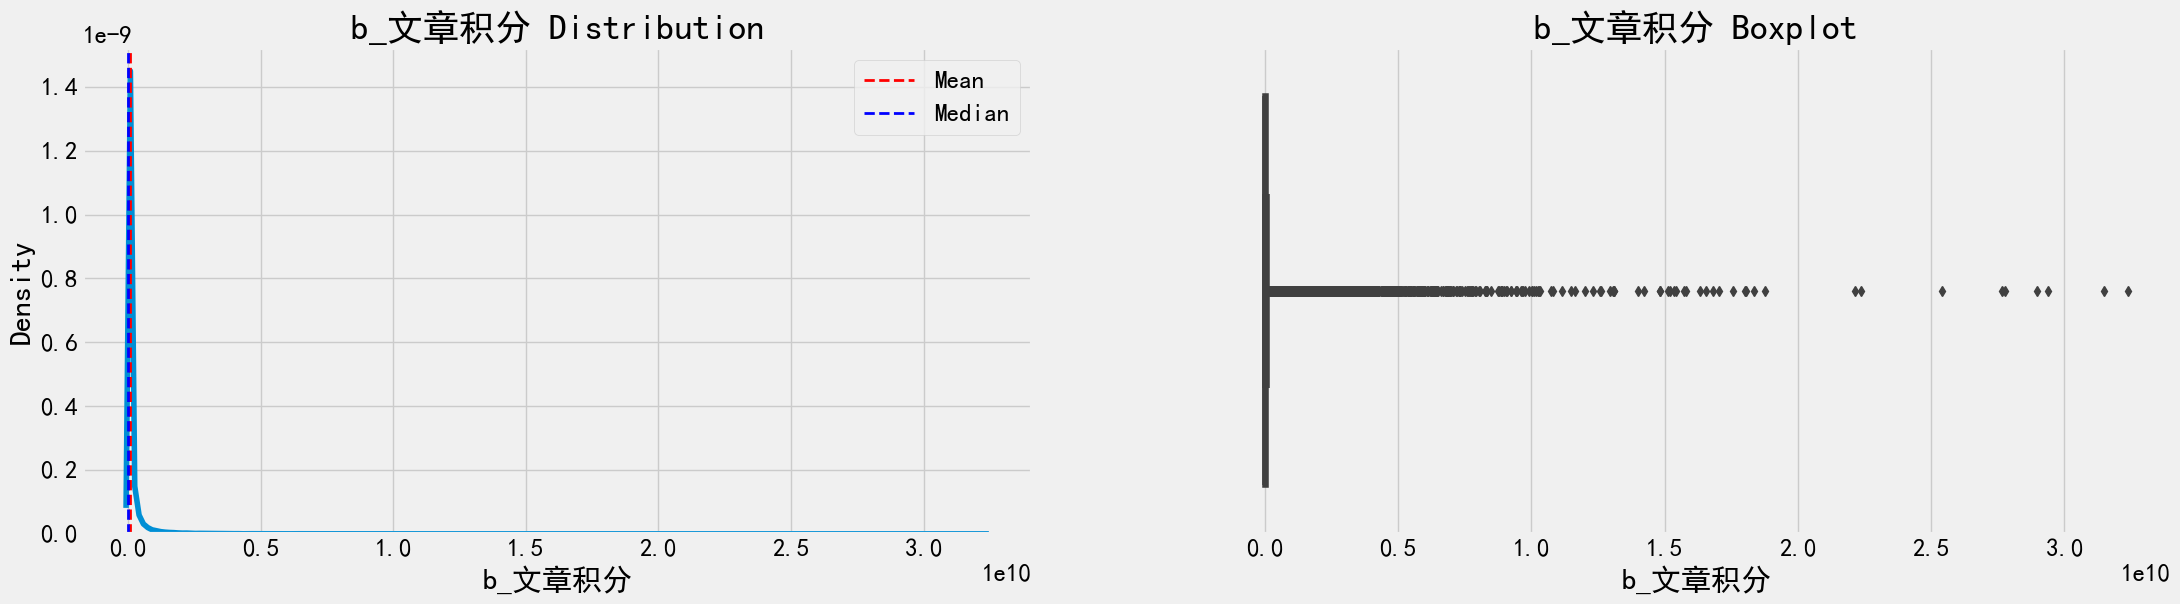

In [45]:
visualize_col('b_文章积分', data)

营养液数

b_营养液数
------------------------------
Mean: 2081.678 - Median: 10.000 - Std: 25675.580
Min: 0.000 - 25%: 0.000 - 50%: 10.000
75%: 300.000 - Max: 4254984.000 - Skew: 57.261
Missing Values: 0/318674 (0.000%)


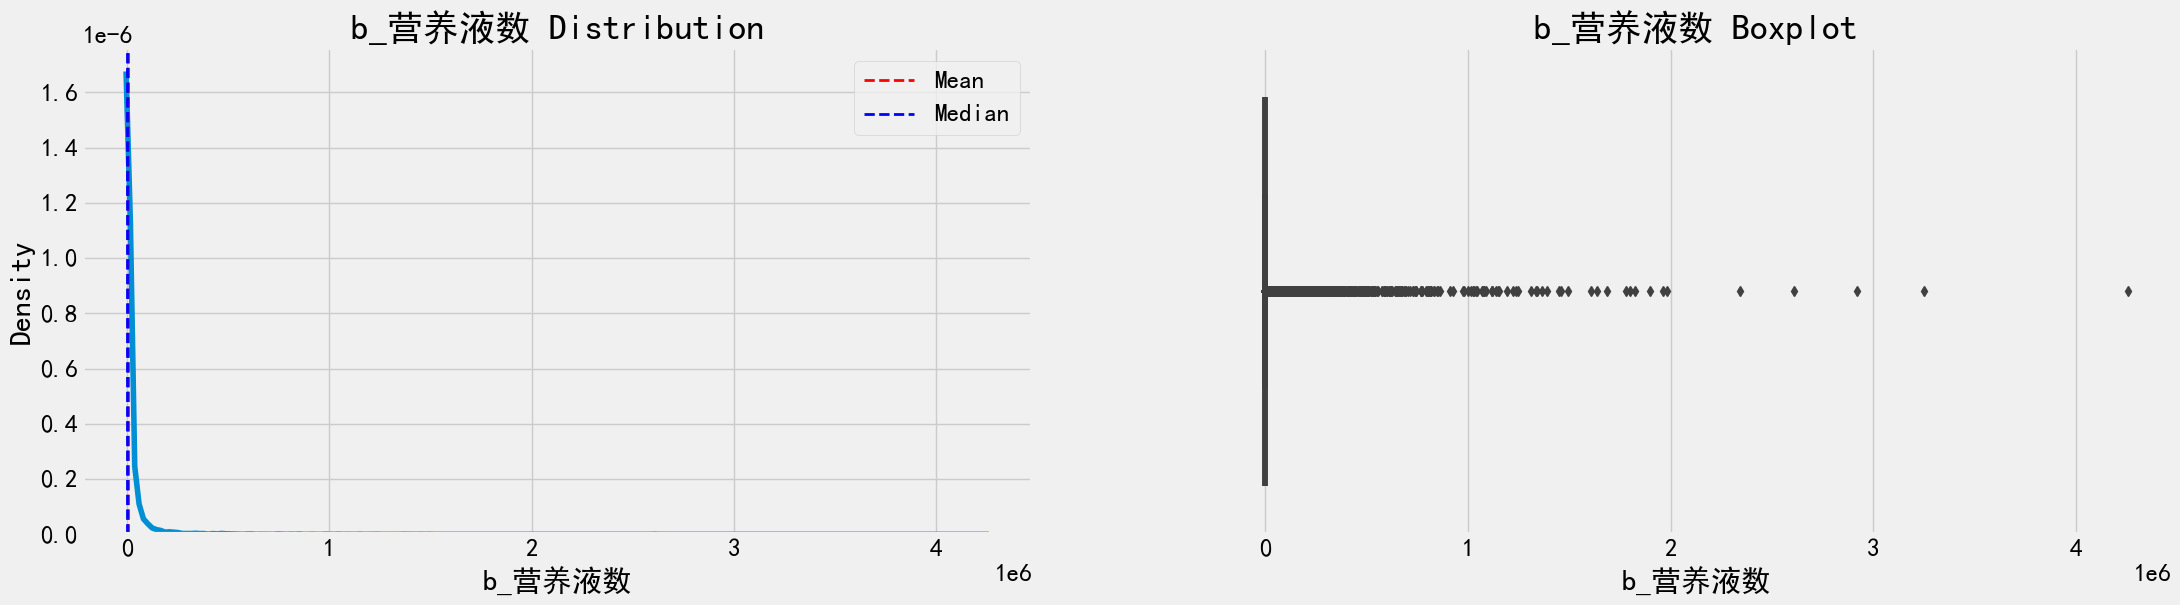

In [46]:
visualize_col('b_营养液数', data)

a_作品状态

<AxesSubplot:xlabel='a_作品状态', ylabel='count'>

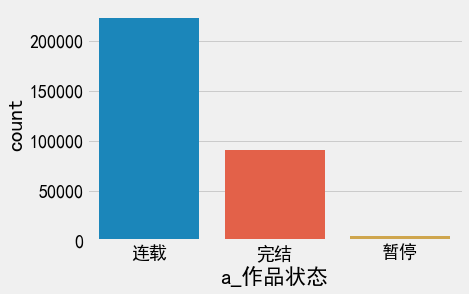

In [47]:
sns.countplot(x='a_作品状态', data=data)

a_最后更新时间

In [61]:
print(f"最早的时间为 {data['a_最后更新时间'].min()}, 最近的时间为 {data['a_最后更新时间'].max()}, 出现时间最多的是{data['a_最后更新时间'].value_counts().index[0]}")

最早的时间为 2004-03-19 14:54:17, 最近的时间为 2022-03-15 13:57:51, 出现时间最多的是2022-03-14 21:00:00


b_作品视角

<AxesSubplot:xlabel='b_作品视角', ylabel='count'>

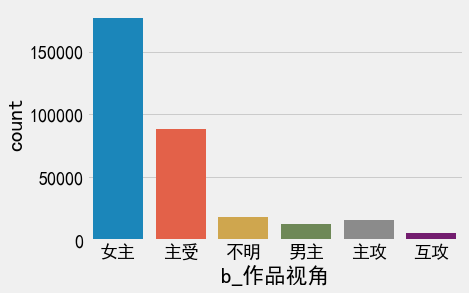

In [69]:
sns.countplot(x='b_作品视角', data=data)

b_作品风格

<AxesSubplot:xlabel='b_作品风格', ylabel='count'>

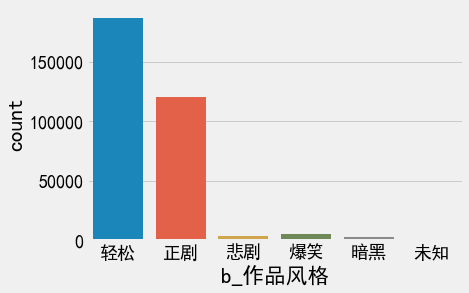

In [70]:
sns.countplot(x='b_作品风格', data=data)

b_文章进度

<AxesSubplot:xlabel='b_文章进度', ylabel='count'>

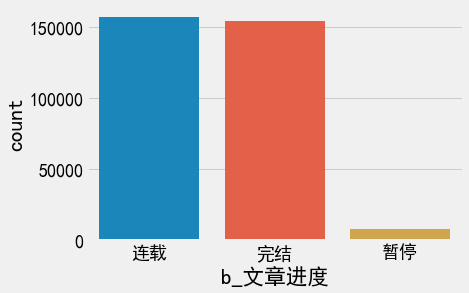

In [72]:
sns.countplot(x='b_文章进度', data=data)

b_签约状态

<AxesSubplot:xlabel='b_签约状态', ylabel='count'>

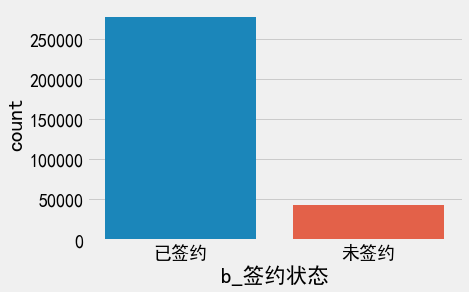

In [73]:
sns.countplot(x='b_签约状态', data=data)